In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with open('metrics_comparison.json', 'r') as f:
    data = json.load(f)

df = pd.DataFrame(data)
df

,Source,Temperature,Personality,num_nodes,num_edges,density,avg_degree,avg_in_degree,avg_out_degree,avg_clustering,avg_shortest_path,mean_pagerank,max_pagerank,max_in_degree,max_out_degree
0,LLM,0.3,baseline,16,16,0.066667,2.000000,1.000000,1.000000,0.000000,4.183333,0.062500,0.210917,2,3
1,LLM,0.3,busybody,13,18,0.115385,2.769231,1.384615,1.384615,0.435897,2.564103,0.076923,0.275701,4,4
2,LLM,0.3,dancer,26,29,0.044615,2.230769,1.115385,1.115385,0.080586,4.452308,0.038462,0.114956,2,7
3,LLM,0.3,hunter,13,19,0.121795,2.923077,1.461538,1.461538,0.564103,2.871795,0.076923,0.297044,5,4
4,LLM,1.5,baseline,21,27,0.064286,2.571429,1.285714,1.285714,0.385714,3.036364,0.047619,0.184152,6,6
5,LLM,1.5,busybody,12,13,0.098485,2.166667,1.083333,1.083333,0.180556,1.714286,0.083333,0.246311,3,4
6,LLM,1.5,dancer,18,20,0.065359,2.222222,1.111111,1.111111,0.074074,3.960784,0.055556,0.206746,3,5
7,LLM,1.5,hunter,23,29,0.057312,2.521739,1.260870,1.260870,0.172464,4.039526,0.043478,0.189129,5,5
8,Wikipedia,N/A,N/A,30,156,0.179310,10.400000,5.200000,5.200000,0.531640,2.128736,0.033333,0.095131,11,11


In [3]:
summary_data = []
for _, row in df.iterrows():
    if row['Source'] == 'Wikipedia':
        label = 'Wikipedia'
    else:
        label = f"T={row['Temperature']} {row['Personality']}"
    
    summary_data.append({
        'Configuration': label,
        'Nodes': row['num_nodes'],
        'Edges': row['num_edges'],
        'Density': round(row['density'], 3),
        'Avg Degree': round(row['avg_degree'], 2),
        'Clustering': round(row['avg_clustering'], 3),
        'Avg Path Length': round(row['avg_shortest_path'], 2)
    })

summary_df = pd.DataFrame(summary_data)
summary_df

,Configuration,Nodes,Edges,Density,Avg Degree,Clustering,Avg Path Length
0,T=0.3 baseline,16,16,0.067,2.00,0.000,4.18
1,T=0.3 busybody,13,18,0.115,2.77,0.436,2.56
2,T=0.3 dancer,26,29,0.045,2.23,0.081,4.45
3,T=0.3 hunter,13,19,0.122,2.92,0.564,2.87
4,T=1.5 baseline,21,27,0.064,2.57,0.386,3.04
5,T=1.5 busybody,12,13,0.098,2.17,0.181,1.71
6,T=1.5 dancer,18,20,0.065,2.22,0.074,3.96
7,T=1.5 hunter,23,29,0.057,2.52,0.172,4.04
8,Wikipedia,30,156,0.179,10.40,0.532,2.13


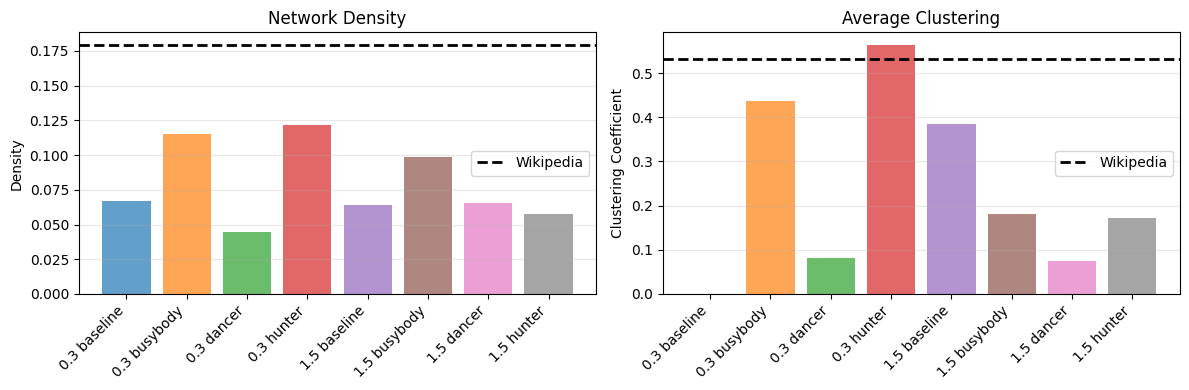

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

llm_data = df[df['Source'] == 'LLM'].copy()
wiki_data = df[df['Source'] == 'Wikipedia'].iloc[0]

llm_data['label'] = llm_data['Temperature'] + ' ' + llm_data['Personality']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', 
          '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']

axes[0].bar(range(len(llm_data)), llm_data['density'], color=colors[:len(llm_data)], alpha=0.7)
axes[0].axhline(y=wiki_data['density'], color='black', linestyle='--', linewidth=2, label='Wikipedia')
axes[0].set_xticks(range(len(llm_data)))
axes[0].set_xticklabels(llm_data['label'], rotation=45, ha='right')
axes[0].set_ylabel('Density')
axes[0].set_title('Network Density')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

axes[1].bar(range(len(llm_data)), llm_data['avg_clustering'], color=colors[:len(llm_data)], alpha=0.7)
axes[1].axhline(y=wiki_data['avg_clustering'], color='black', linestyle='--', linewidth=2, label='Wikipedia')
axes[1].set_xticks(range(len(llm_data)))
axes[1].set_xticklabels(llm_data['label'], rotation=45, ha='right')
axes[1].set_ylabel('Clustering Coefficient')
axes[1].set_title('Average Clustering')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

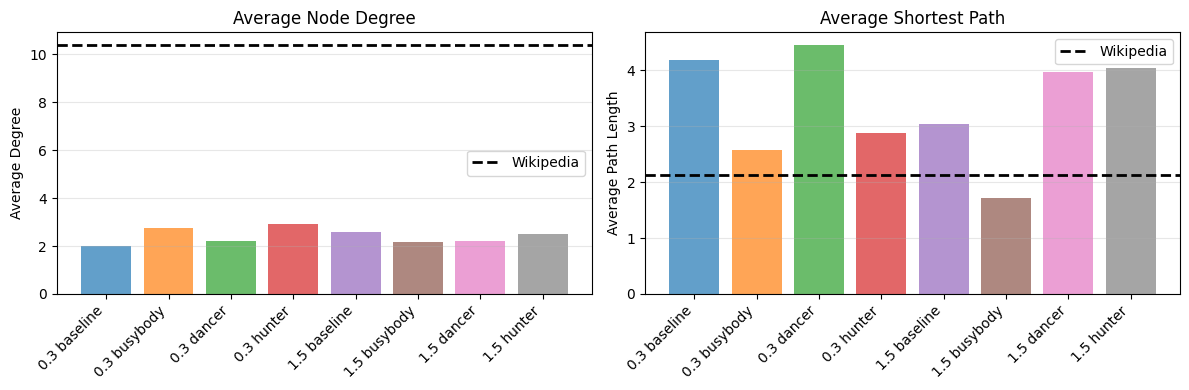

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].bar(range(len(llm_data)), llm_data['avg_degree'], color=colors[:len(llm_data)], alpha=0.7)
axes[0].axhline(y=wiki_data['avg_degree'], color='black', linestyle='--', linewidth=2, label='Wikipedia')
axes[0].set_xticks(range(len(llm_data)))
axes[0].set_xticklabels(llm_data['label'], rotation=45, ha='right')
axes[0].set_ylabel('Average Degree')
axes[0].set_title('Average Node Degree')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

axes[1].bar(range(len(llm_data)), llm_data['avg_shortest_path'], color=colors[:len(llm_data)], alpha=0.7)
axes[1].axhline(y=wiki_data['avg_shortest_path'], color='black', linestyle='--', linewidth=2, label='Wikipedia')
axes[1].set_xticks(range(len(llm_data)))
axes[1].set_xticklabels(llm_data['label'], rotation=45, ha='right')
axes[1].set_ylabel('Average Path Length')
axes[1].set_title('Average Shortest Path')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()